## Laboratorio: Análisis de Datos con Python

### Parte 1: Numpy:

1) ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [2]:
import numpy as np 
import sys

sample_arr = [True, False]
bool_arr = np.random.choice(sample_arr, size=1000)

sys.getsizeof(bool_arr)

1104

2) Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [32]:
# enteros pares 
array = np.arange(start=2,stop=101,step=2)

#tomar los ultimos 10
bottom10 = np.partition(array,1)[:10]

print(bottom10[::-1])

[20 18 16 14 12 10  8  6  4  2]


3) Dado el array <br>
2 4 5 6
0 3 7 4
8 8 5 2
1 5 6 1 <br>
Seleccione con una instrucción el subarray de elementos <br>
0 3 7 4 <br>
Después, seleccione el subarray de elementos <br>
2 5
8 5

In [43]:
array = np.array([2, 4, 5, 6, 0, 3, 7, 4, 8, 8, 5, 2, 1, 5, 6, 1])
array[4:8]

array([0, 3, 7, 4])

In [44]:
array[[0,2,8,10]] 

array([2, 5, 8, 5])

4. Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [39]:
a = np.array([1, 4, 2, 7]) 
b = np.array([1, 3, 2, 9])
dif = a - b
dif

array([ 0,  1,  0, -2])

In [45]:
mean = np.mean(dif)
mean

-0.25

5. Tengo valores de cordenadas (x, y) en las columnas del array </br>
1.33 4.5 </br>
30.0 10.7 </br>
70.2 0.5 </br>
Agregue a este array las coordenadas (37.1, -3.6).
Muestre en pantalla las dimensiones del nuevo
array.

In [56]:
array = np.array([[1.33, 4.5], [30.0, 10.7], [70.2, 0.5]])
array

array([[ 1.33,  4.5 ],
       [30.  , 10.7 ],
       [70.2 ,  0.5 ]])

In [57]:
array = np.append(array, [[37.1, -3.6]], axis=0)
array

array([[ 1.33,  4.5 ],
       [30.  , 10.7 ],
       [70.2 ,  0.5 ],
       [37.1 , -3.6 ]])

In [58]:
print(array.shape)

(4, 2)


6. Copie el array del ejercicio anterior. Traspóngalo (.Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [59]:
tarray = np.transpose(array)
tarray

array([[ 1.33, 30.  , 70.2 , 37.1 ],
       [ 4.5 , 10.7 ,  0.5 , -3.6 ]])

In [60]:
tarray = np.append(tarray, [[10.8, 3.0],[35.8, 12.0]], axis=1)
tarray

array([[ 1.33, 30.  , 70.2 , 37.1 , 10.8 ,  3.  ],
       [ 4.5 , 10.7 ,  0.5 , -3.6 , 35.8 , 12.  ]])

### Parte 2: Exploración y Minería de Datos:

Con el dataset nucleospoblacion.csv adjunto al laboratorio,
luego responda las siguientes preguntas usando pandas y
matplotlib.

In [3]:
import pandas as pd
dataset = pd.read_csv('NucleosPoblacion.csv')

1) ¿Cuántos Municipios tienen más de 100000 habitantes?.

In [89]:
ds1 = dataset[dataset["Poblacion"] > 100000]
len(ds1)


62

2) Realice una gráfica de barras sobre la población de cada ciudad, ordenela de menor a mayor y responda: </br> 
a. ¿Cuál es la segunda ciudad más poblada? </br>
b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?


In [85]:
import matplotlib.pyplot as plt

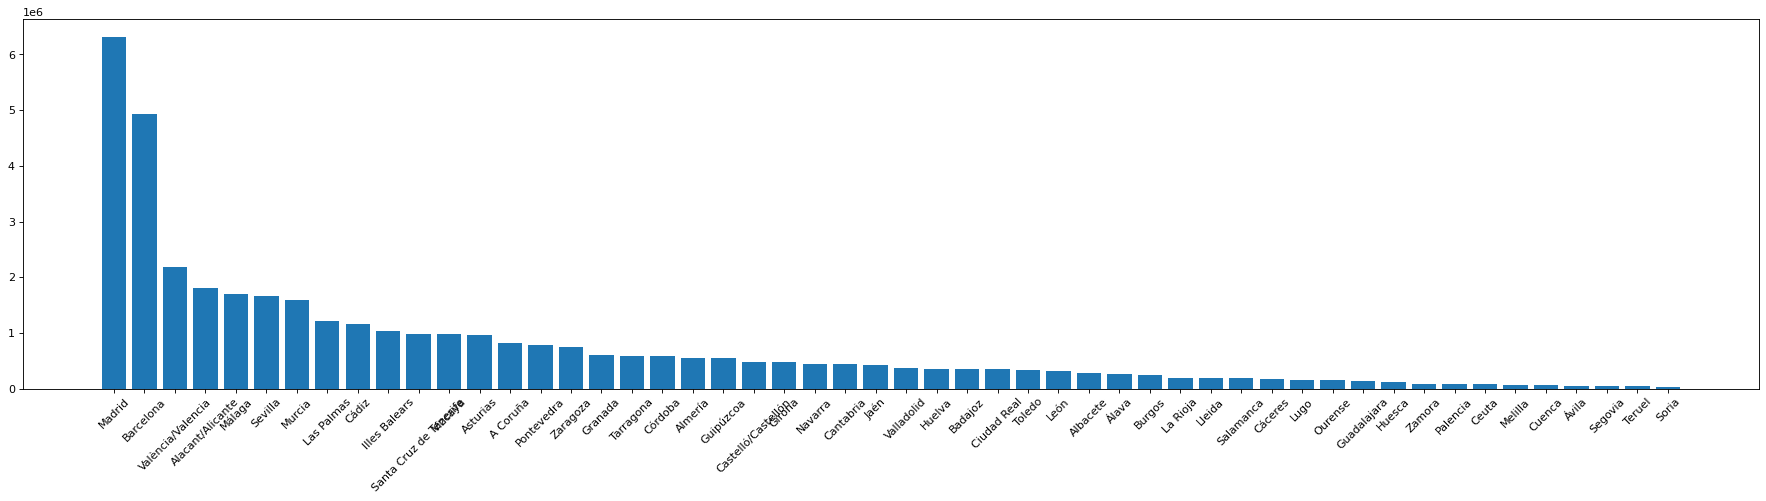

In [162]:
ds2 = dataset[["Provincia","Poblacion"]]
ds2 = ds2.groupby("Provincia").sum().reset_index()
ds2 = ds2.sort_values("Poblacion", ascending = False).reset_index(drop = True)
ds2

plt.figure(figsize=(28,6),dpi=80)
plt.bar(x = "Provincia", height = "Poblacion", data = ds2)
plt.xticks(rotation = 45)
plt.show()

#a. Barcelona

In [129]:
#Ranking Granada
ds2.index[ds2["Provincia"] == "Granada"].tolist()[0] + 1

17

3) ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?.

In [8]:
ds3 = dataset[(dataset["Poblacion"] > 5000) &
             (dataset["Provincia"].isin(["Caceres","Badajoz"]))]
ds3 = ds3[["Municipio","Poblacion"]]
ds3 = ds3.groupby("Municipio").sum().reset_index()
len(ds3)

9

4) ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [143]:
ds4 = dataset[["Municipio","Provincia","Poblacion","Y"]]
ds4 = ds4.sort_values("Y", ascending = False).reset_index(drop = True)
ds4.iloc[0]

Municipio      Viveiro
Provincia         Lugo
Poblacion      16211.0
Y            43.625578
Name: 0, dtype: object

5) Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [145]:
ds5 = dataset[(dataset["Provincia"]=="Granada")]
ds5 = ds5[["Municipio","Poblacion"]]
ds5 = ds5.groupby("Municipio").sum().reset_index()
ds5.describe()

,Poblacion
count,20.000000
mean,30217.850000
std,50355.491715
min,10386.000000
25%,13146.500000
50%,17526.000000
75%,21739.750000
max,239154.000000


6) Realice un histograma con la población de los Municipios para cada una de las provincias.

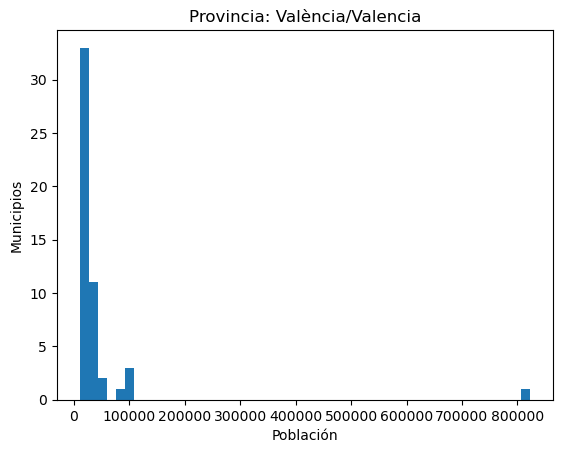

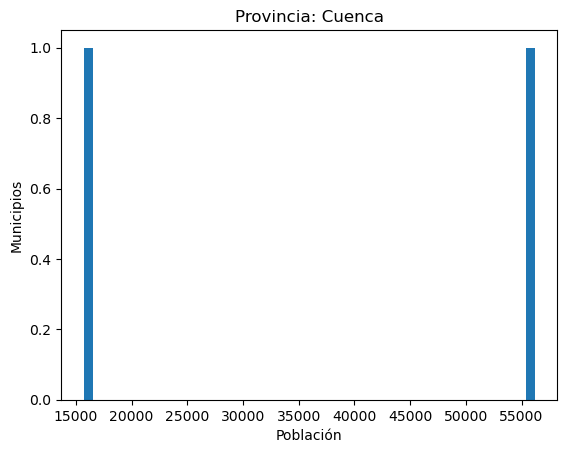

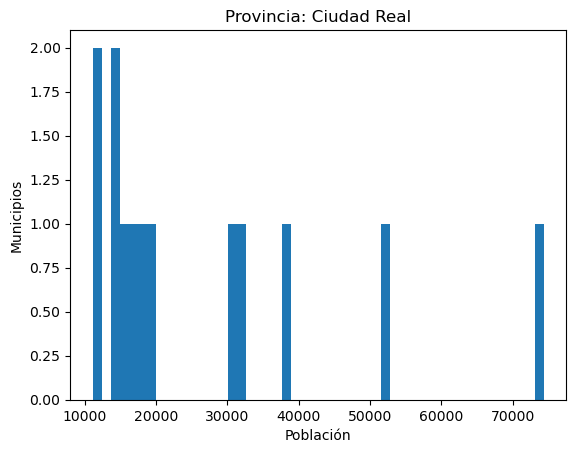

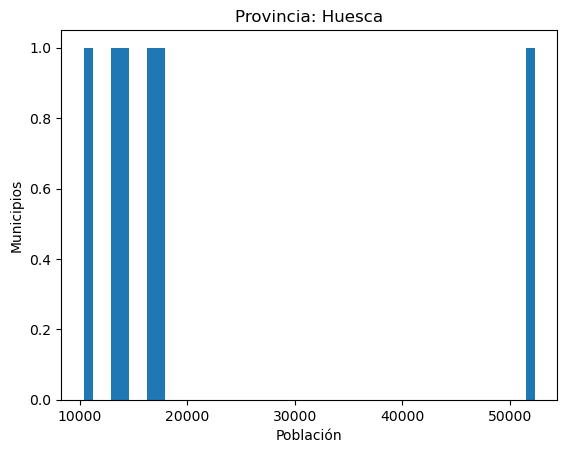

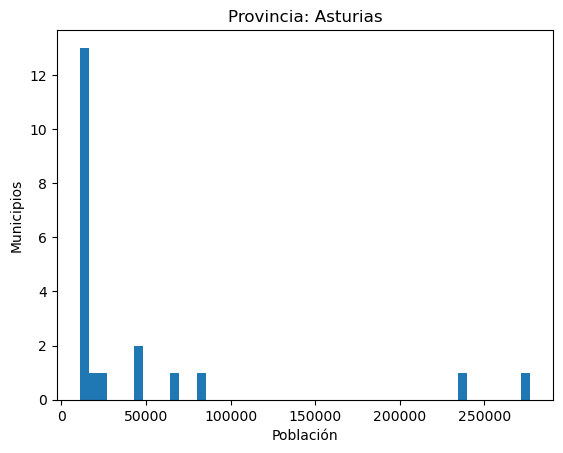

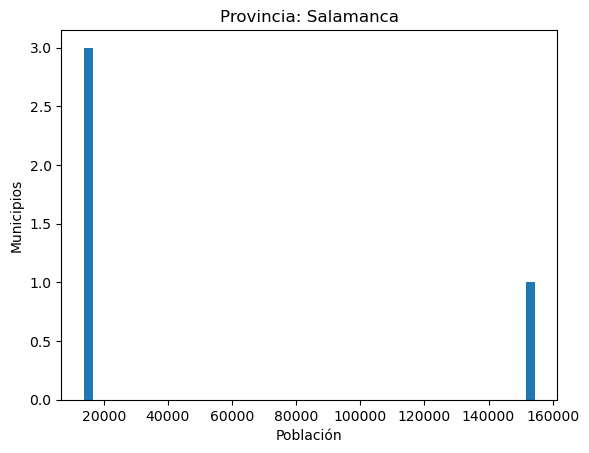

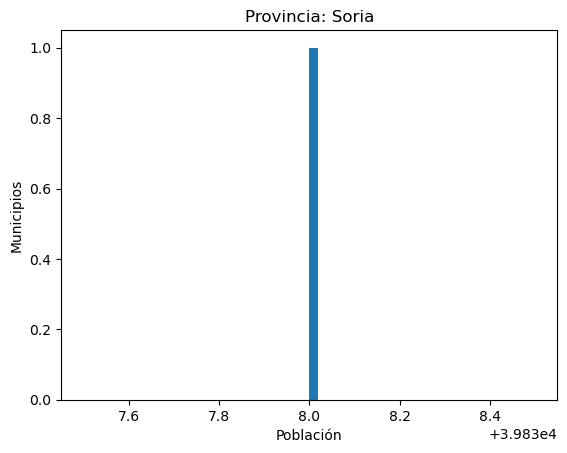

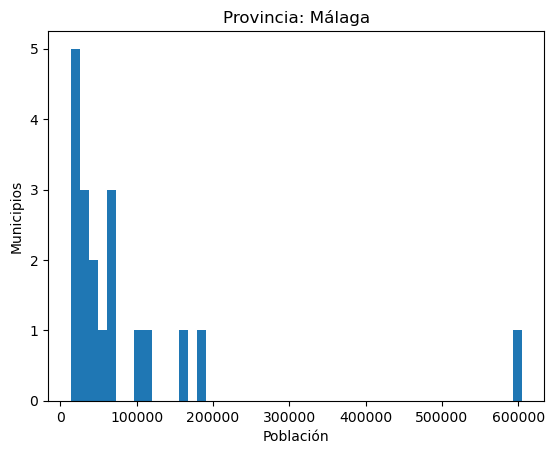

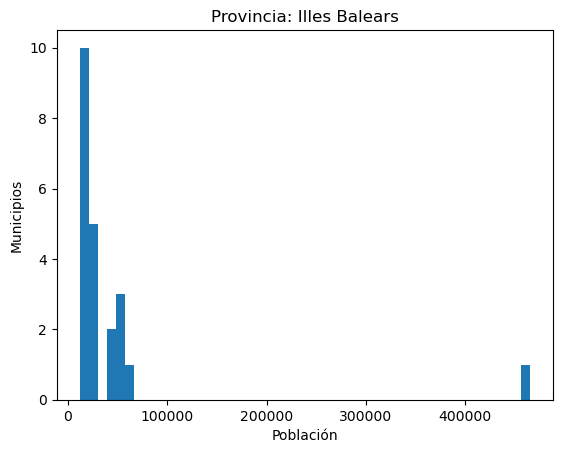

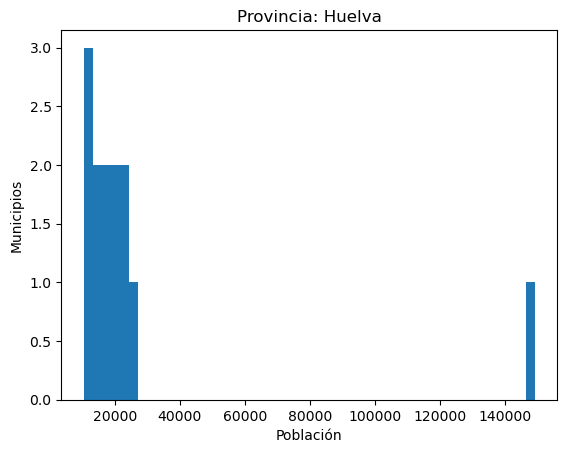

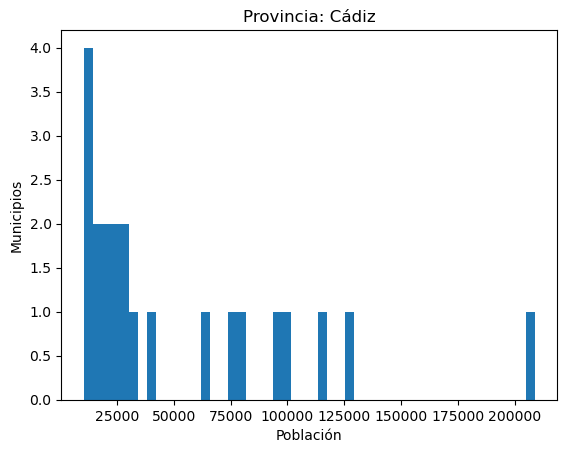

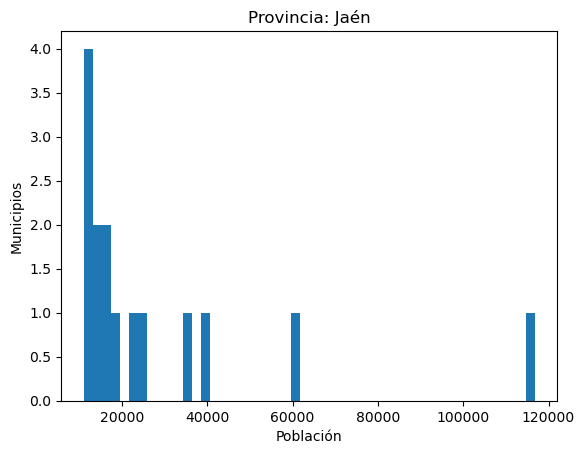

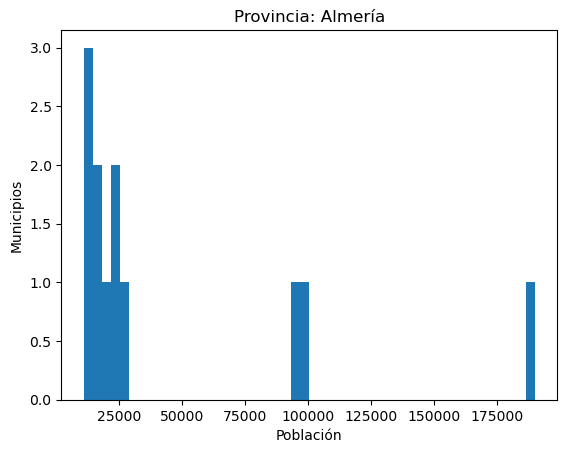

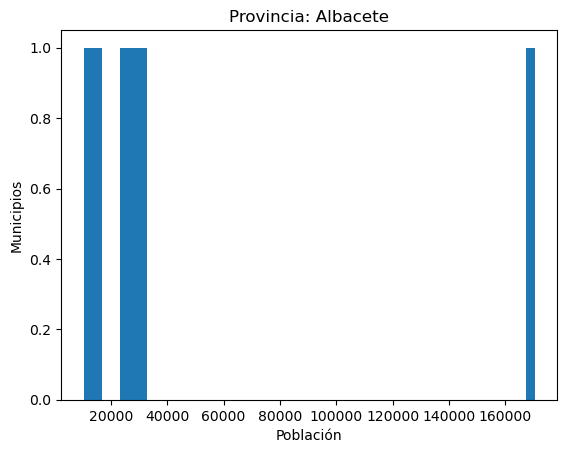

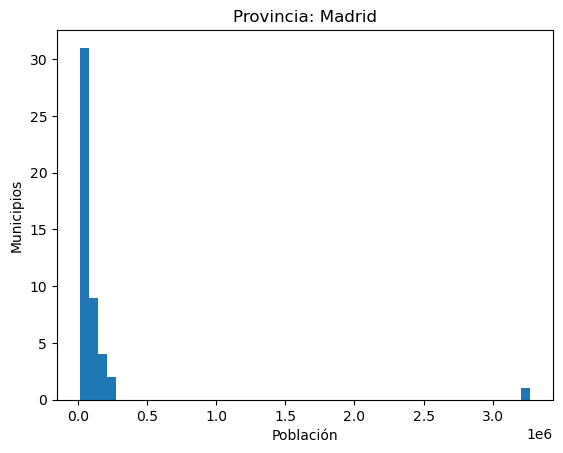

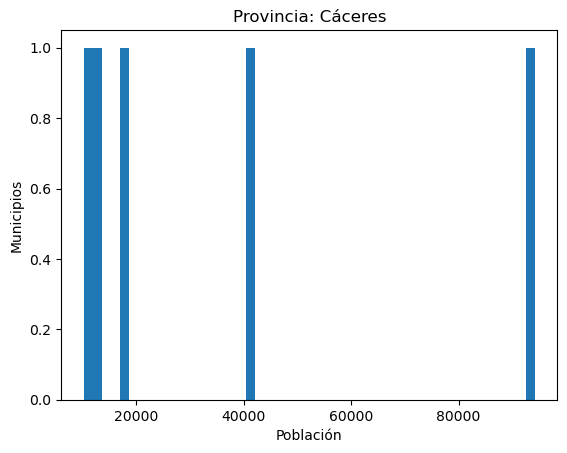

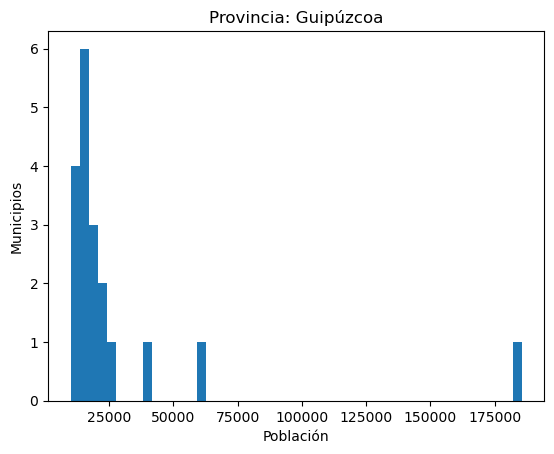

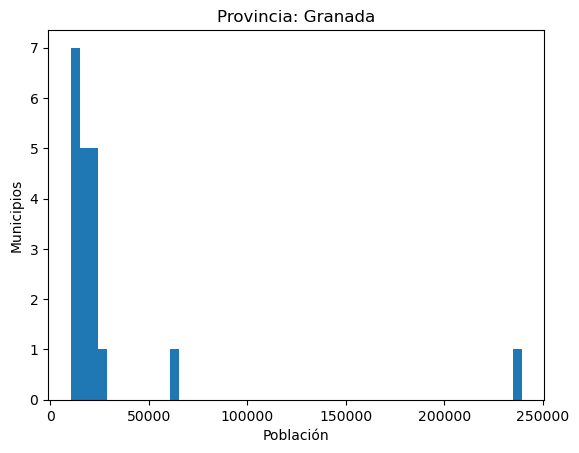

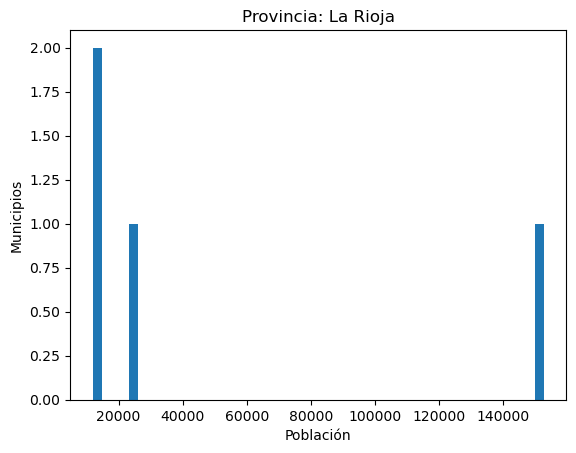

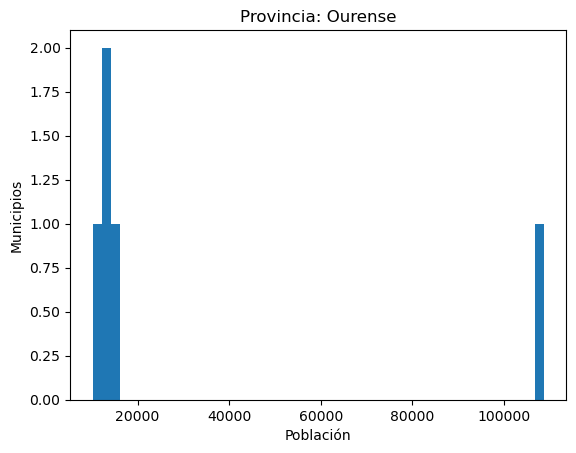

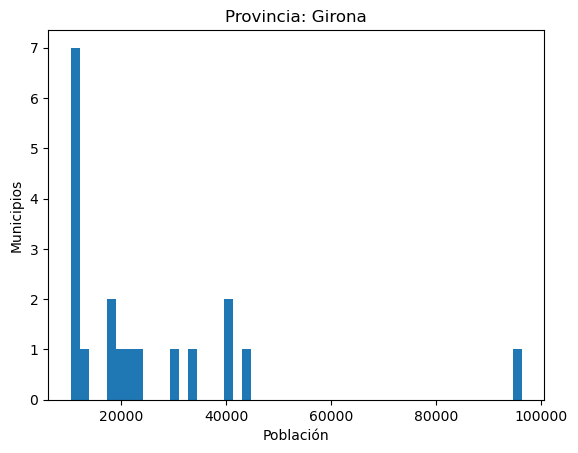

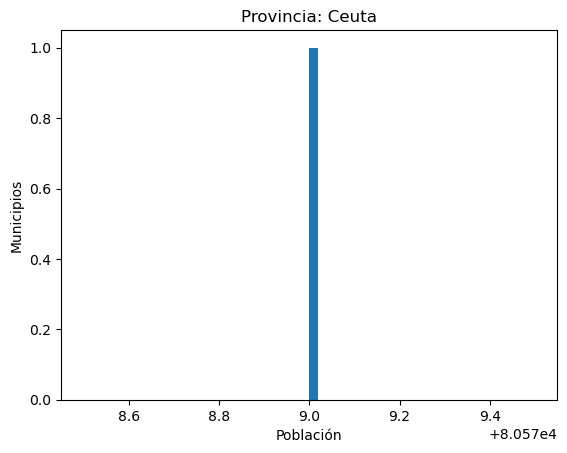

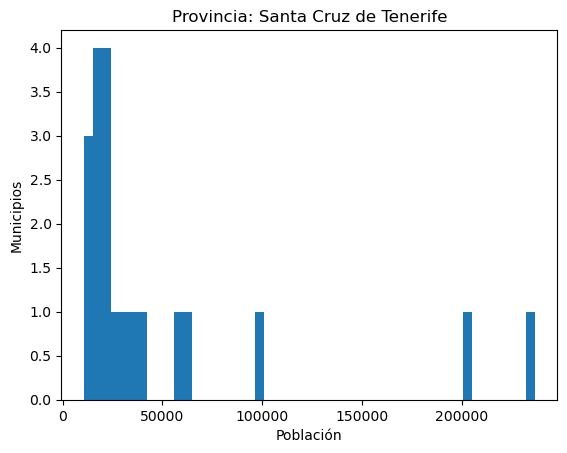

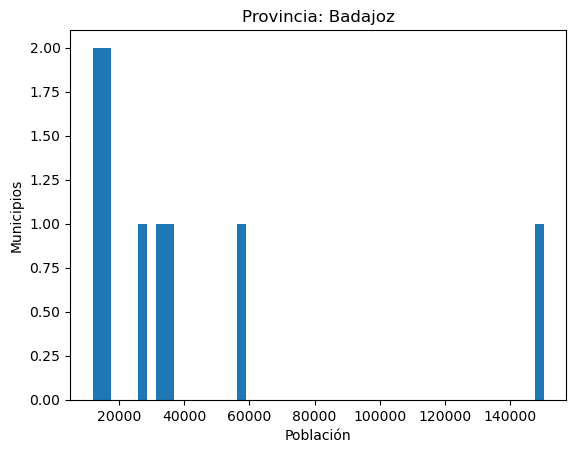

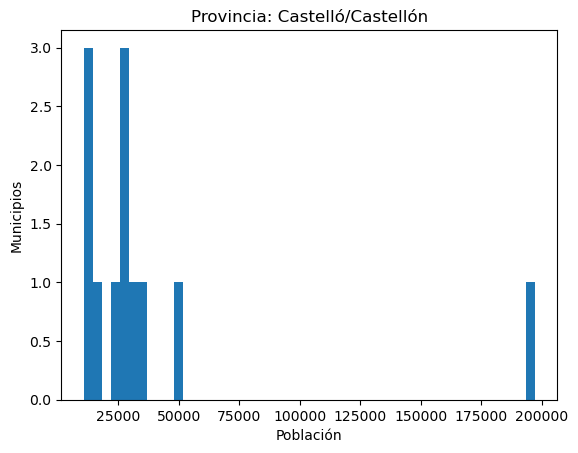

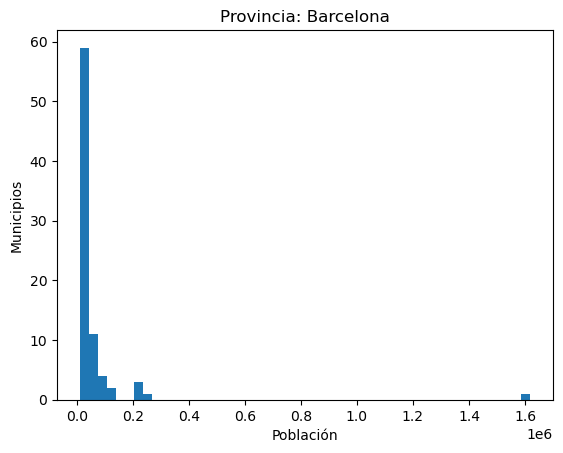

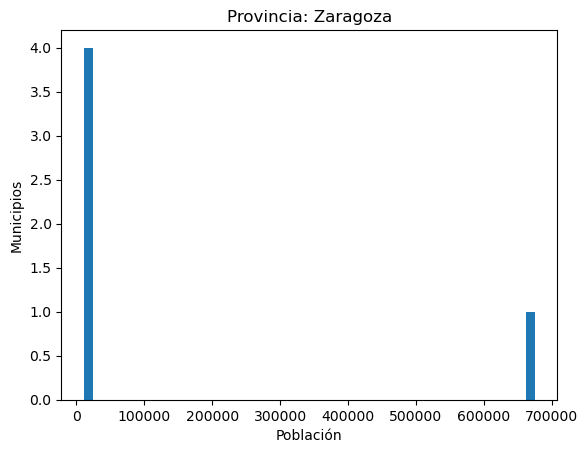

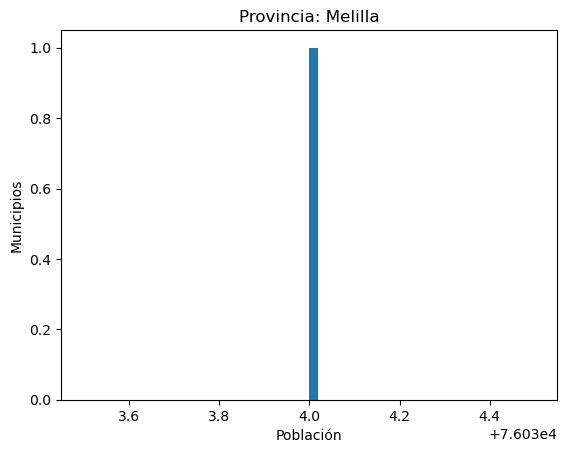

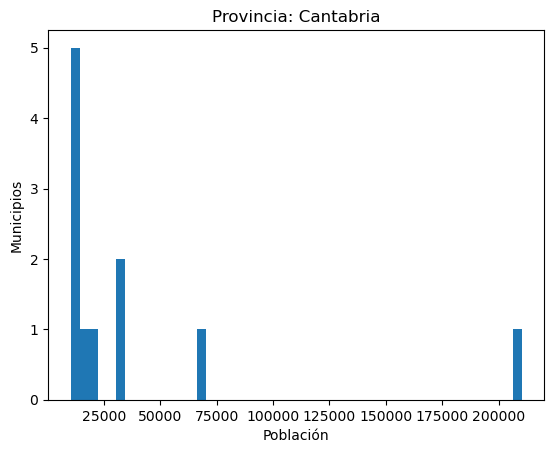

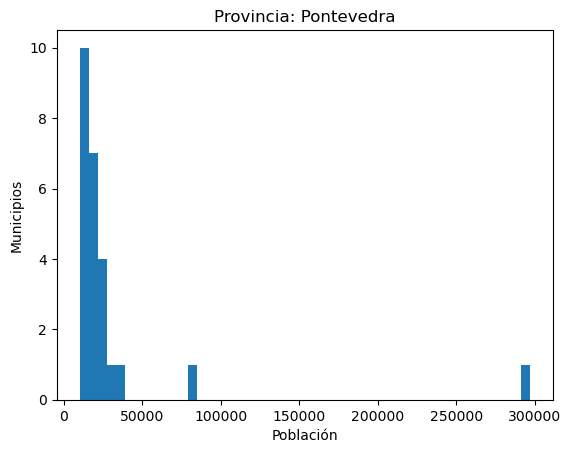

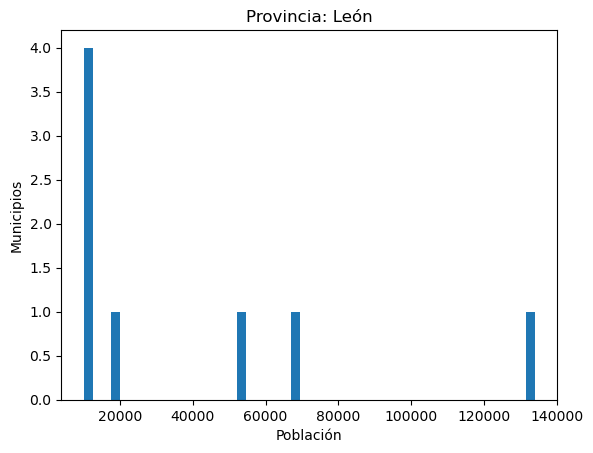

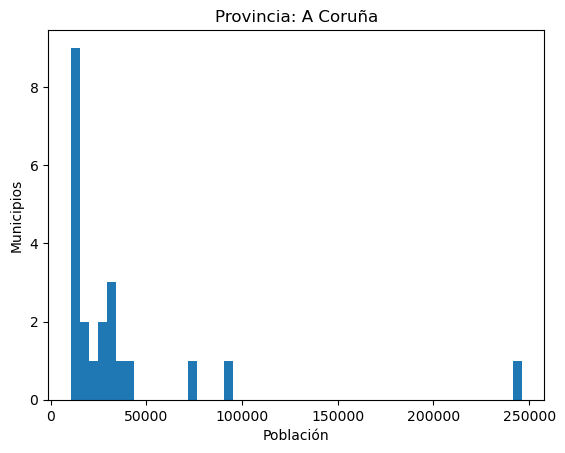

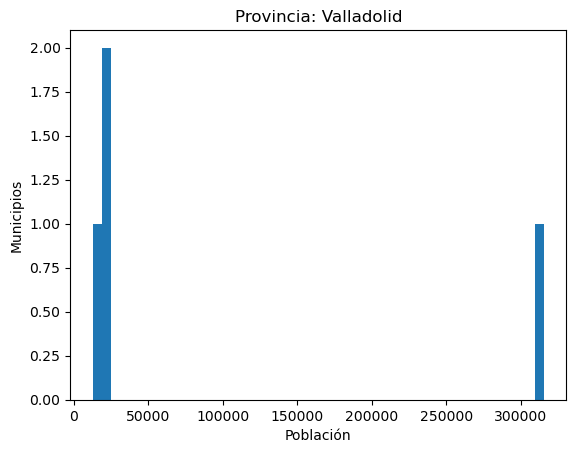

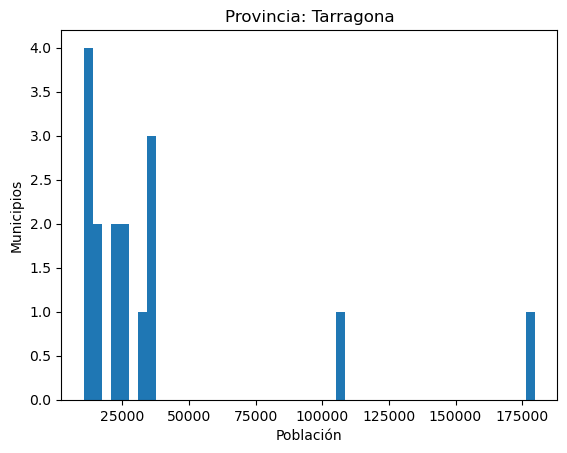

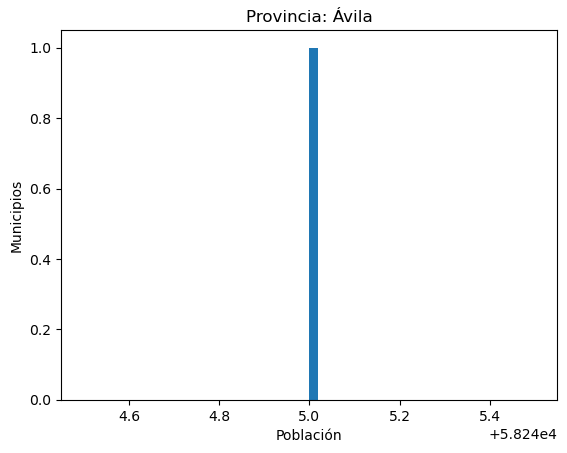

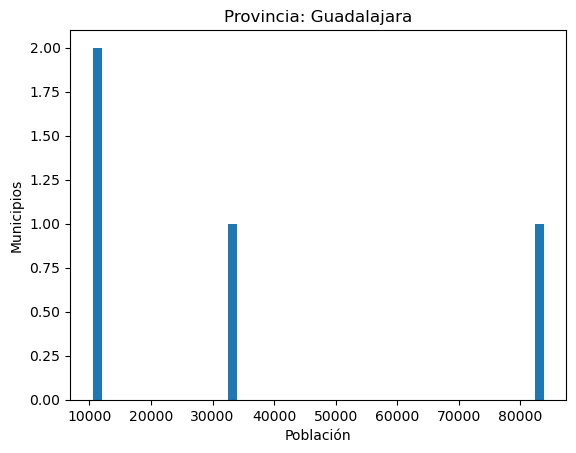

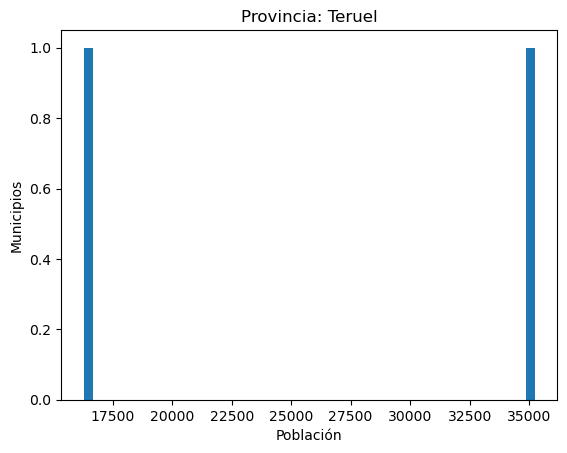

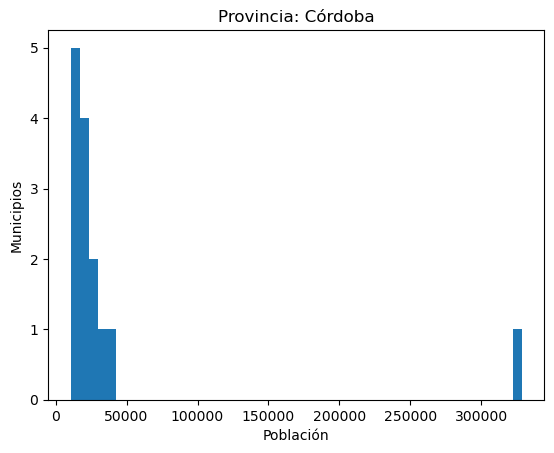

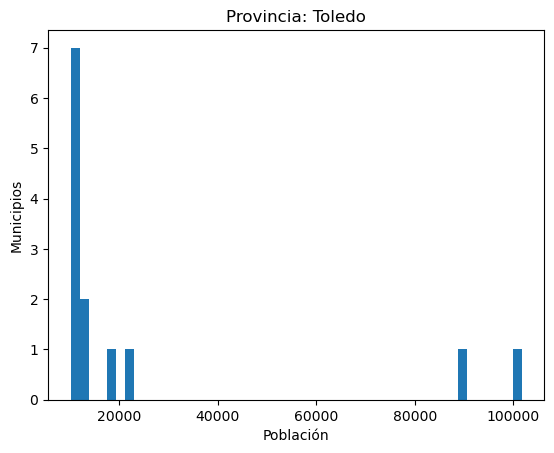

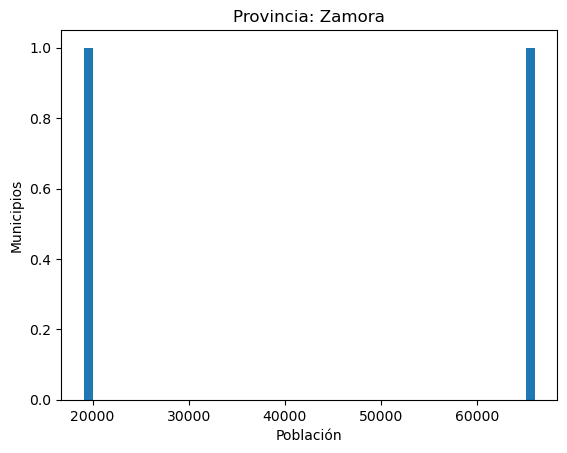

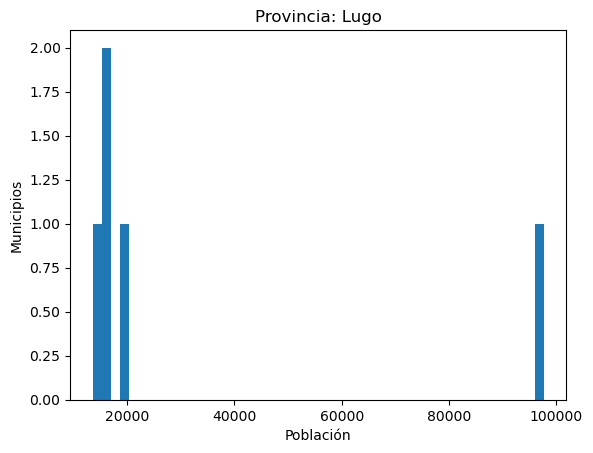

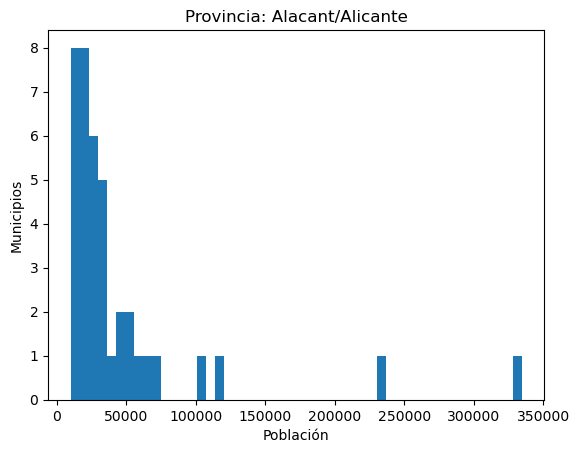

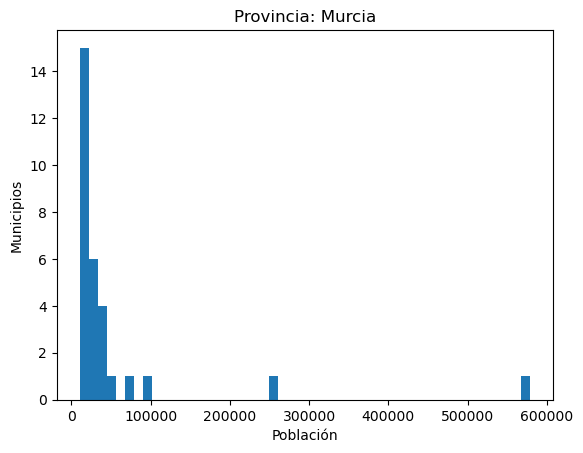

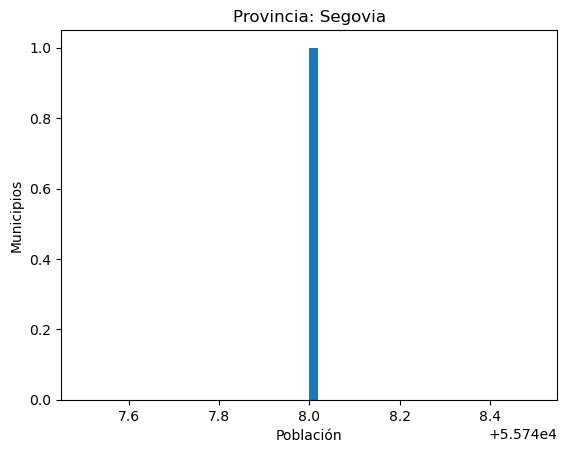

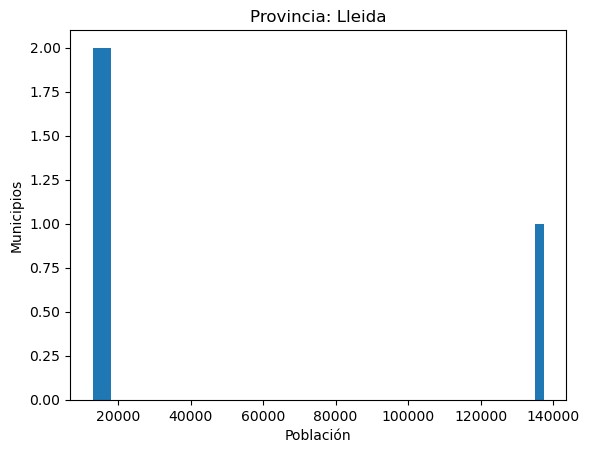

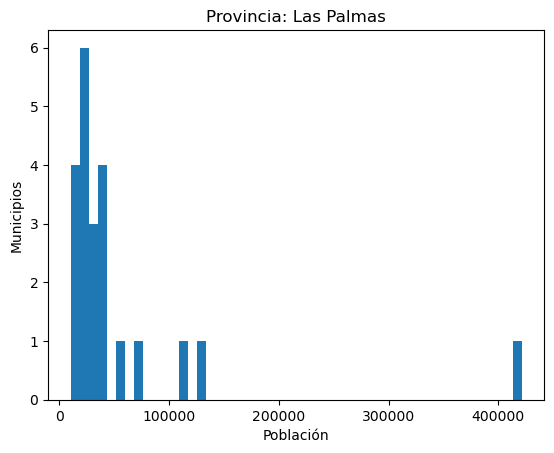

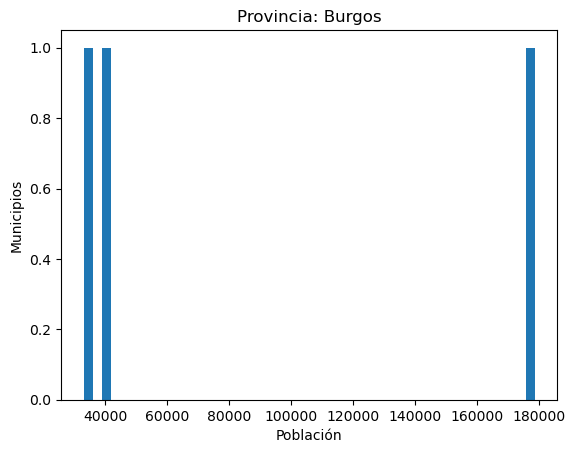

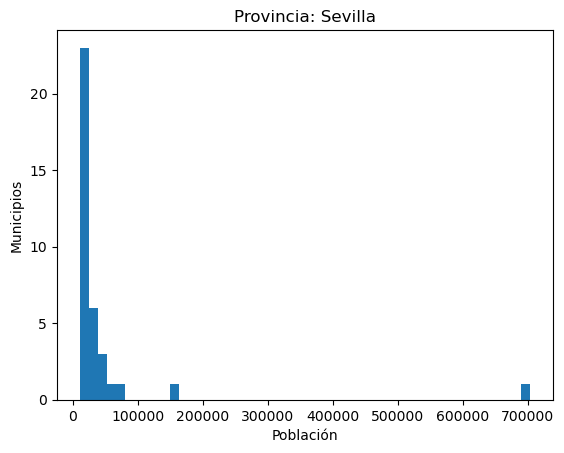

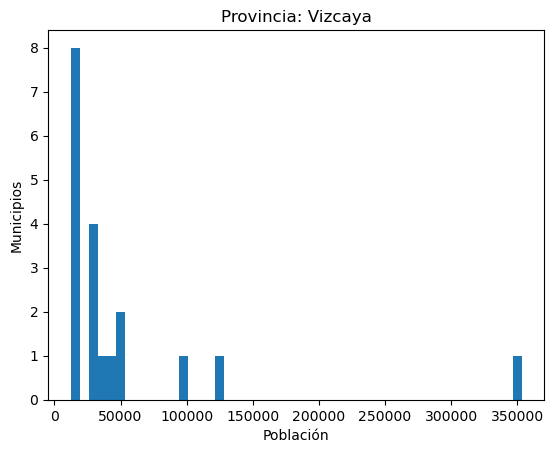

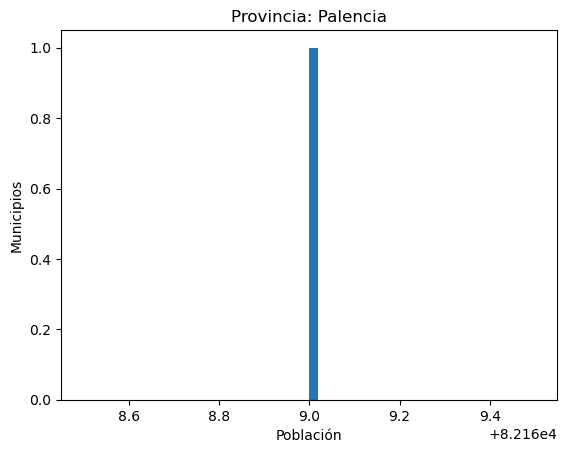

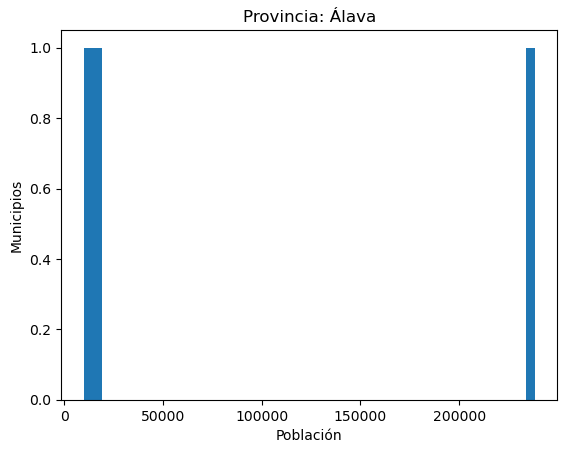

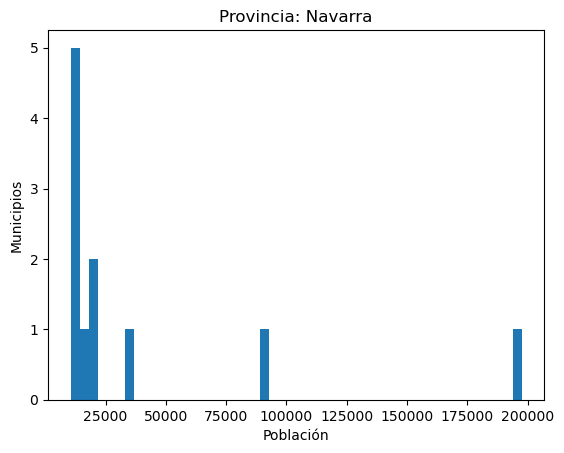

In [186]:
ds6 = dataset[["Poblacion","Provincia","Municipio"]]
# ds6

for f in set(ds6["Provincia"].unique()):
    temp = ds6[ds6["Provincia"] == f]
    prov = f
    temp = temp.groupby("Municipio").sum().reset_index()
    
    plt.hist(temp["Poblacion"], bins=50)
    plt.title("Provincia: {}".format(prov))
    plt.xlabel("Población")
    plt.ylabel("Municipios")
    plt.show()

7) Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [175]:
ds7 = dataset[["Poblacion","Municipio"]]
ds7 = ds7.groupby("Municipio").sum().reset_index()
ds7 = ds7.sample(50)  
ds7.describe()

,Poblacion
count,5.000000e+01
mean,1.207222e+05
std,4.598635e+05
min,1.004500e+04
25%,1.472600e+04
50%,2.401350e+04
75%,5.957650e+04
max,3.273049e+06


8) Dígame los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [209]:
dsm = dataset[dataset["Municipio"]=="Madrid"]
dsm = dsm[["X","Y"]]
dsm["dummy"] = 1

pd.set_option('mode.chained_assignment', None)

ds8 = dataset[["Municipio","X","Y"]]
ds8["XMadrid"] = dsm["X"].iloc[0]
ds8["YMadrid"] = dsm["Y"].iloc[0]
ds8["DistX"] =  ds8["X"]-ds8["XMadrid"]
ds8["DistY"] =  ds8["Y"]-ds8["YMadrid"]

ds8 = ds8[(ds8["Municipio"]!="Madrid")]
ds8 = ds8[["Municipio","DistX","DistY"]]
ds8 = ds8.sort_values("Municipio", ascending = False).reset_index(drop = True)
ds8.head(1)



,Municipio,DistX,DistY
0,Úbeda,0.332605,-2.405132


In [202]:
ds8.tail(1)

,Municipio,DistX,DistY
850,A Coruña,-4.687351,2.953496
